### 1: Load Data

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"D:\Guvi\Projects\mini\Amazon Delivery Time Prediction\Amazon_delivery_time_prediction\data\amazon_delivery.csv")
print("✅ Dataset loaded successfully.")
df.head()


✅ Dataset loaded successfully.


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### 2: Dataset Overview

In [3]:
print("🔹 Dataset shape:", df.shape)
print("\n🔹 Column data types:")
print(df.dtypes)


🔹 Dataset shape: (43739, 16)

🔹 Column data types:
Order_ID            object
Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Order_Date          object
Order_Time          object
Pickup_Time         object
Weather             object
Traffic             object
Vehicle             object
Area                object
Delivery_Time        int64
Category            object
dtype: object


### 3: Missing Values

In [4]:
print("\n🔹 Missing values per column:")
print(df.isnull().sum())


🔹 Missing values per column:
Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


### 4: Summary Statistics

In [5]:
print("\n🔹 Summary statistics (numerical columns):")
print(df.describe())


🔹 Summary statistics (numerical columns):
          Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count  43739.000000  43685.000000    43739.000000     43739.000000   
mean      29.567137      4.633780       17.210960        70.661177   
std        5.815155      0.334716        7.764225        21.475005   
min       15.000000      1.000000      -30.902872       -88.366217   
25%       25.000000      4.500000       12.933298        73.170283   
50%       30.000000      4.700000       18.551440        75.898497   
75%       35.000000      4.900000       22.732225        78.045359   
max       50.000000      6.000000       30.914057        88.433452   

       Drop_Latitude  Drop_Longitude  Delivery_Time  
count   43739.000000    43739.000000   43739.000000  
mean       17.459031       70.821842     124.905645  
std         7.342950       21.153148      51.915451  
min         0.010000        0.010000      10.000000  
25%        12.985996       73.280000      90.000000  
50

### 5: Value Counts for Categorical Columns

In [6]:
categorical_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Weather value counts:
Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64

Traffic value counts:
Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64

Vehicle value counts:
Vehicle
motorcycle     25527
scooter        14639
van             3558
bicycle           15
Name: count, dtype: int64

Area value counts:
Area
Metropolitian     32698
Urban              9751
Other              1138
Semi-Urban          152
Name: count, dtype: int64

Category value counts:
Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name: count, dtype: int64


### 1. Visualize Distributions
Helps detect skewness, outliers, and variability.

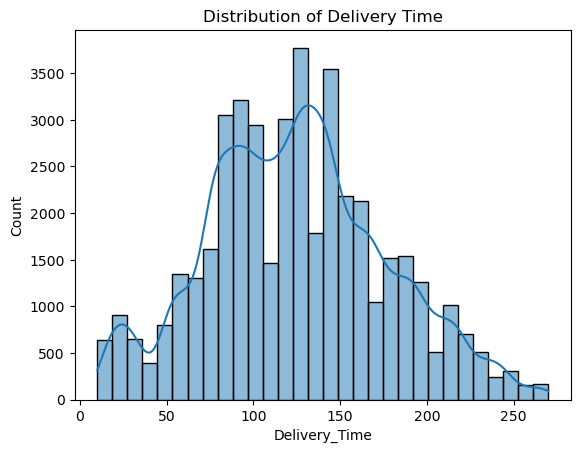

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of delivery times
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.show()

### 2. Categorical Impact on Target
Understand how categories (like weather or traffic) affect delivery time.

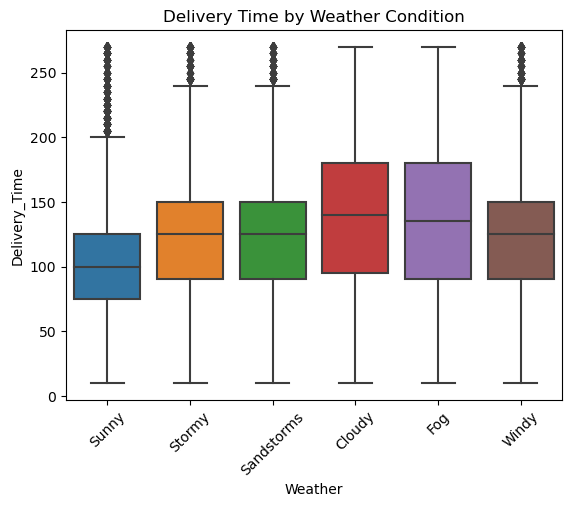

In [8]:
# Boxplot of delivery time vs weather
sns.boxplot(x='Weather', y='Delivery_Time', data=df)
plt.xticks(rotation=45)
plt.title("Delivery Time by Weather Condition")
plt.show()

### 3. Correlation Heatmap
Check how numerical variables are related.

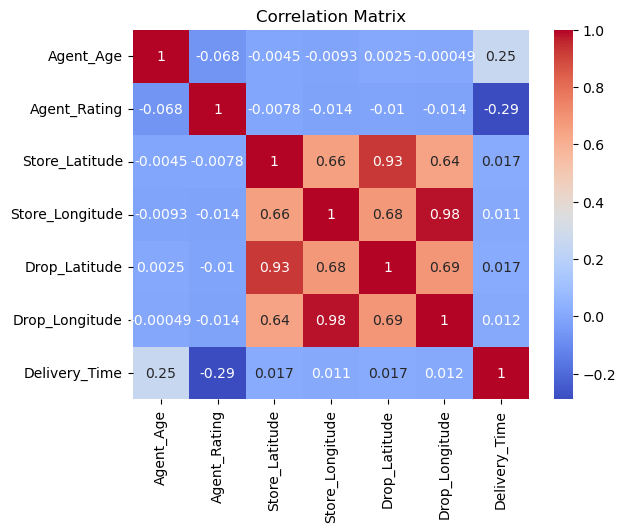

In [9]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 4. Scatter Plots
Explore relationships (e.g., Distance vs. Delivery Time)

In [10]:
sns.scatterplot(x='Distance_km', y='Delivery_Time', data=df)
plt.title("Delivery Time vs Distance")
plt.show()

ValueError: Could not interpret value `Distance_km` for parameter `x`

### 5. Group-Based Aggregations
Look at trends over time, area, or agent ratings.

In [11]:
# Average delivery time by day of week
df.groupby('Order_DayOfWeek')['Delivery_Time'].mean().plot(kind='bar')
plt.title("Avg Delivery Time by Day of Week")
plt.show()

KeyError: 'Order_DayOfWeek'

### 6. Outlier Detection
Identify extreme values that might distort the model.

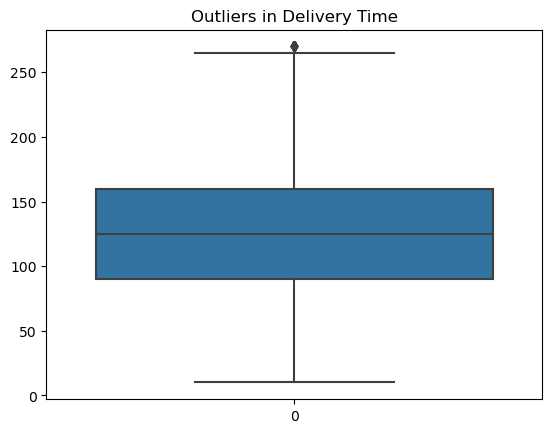

In [13]:
sns.boxplot(df['Delivery_Time'])
plt.title("Outliers in Delivery Time")
plt.show()

### 7. Missing Value Pattern
Use a heatmap to see missing patterns.

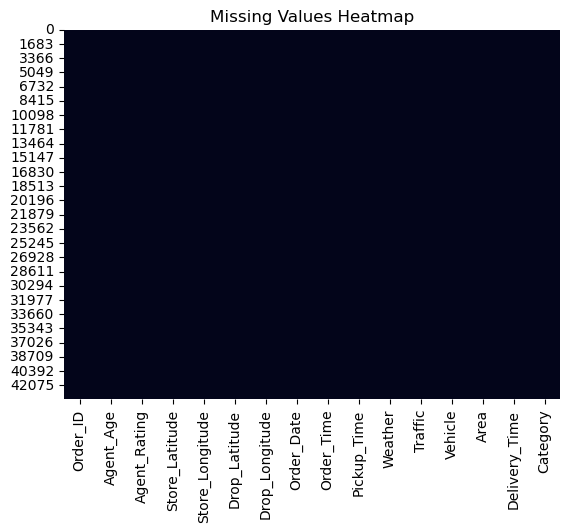

In [14]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()